<a href="https://colab.research.google.com/github/abay-qkt/shap-handbook/blob/main/shap_handbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

# shap

機械学習モデルを解釈するためのライブラリとして、SHAPというものが公開されています。  
https://shap.readthedocs.io/en/latest/

こちらの記事で基本的な使い方やどういった解釈の仕方ができるか紹介されていて参考になります。  
https://tech.datafluct.com/entry/20220223/1645624741

SHAPの仕組みについてこちらの記事が参考になりました。   
SHAPのもととなっているシャープレイ値の説明がありとても勉強になります。    
https://www.datarobot.com/jp/blog/explain-machine-learning-models-using-shap/

## バージョンの違い

shapはv3.6.0を機にAPIの仕様が大きく変わったところがあります。  
昔は.shap_valuesでshap値をnumpy配列で返していましたが、  
v3.6.0以降だと、explainerを直接呼ぶことでshap値含め諸々の情報が入ったオブジェクトを返します。  
shapに関する記事を読む場合どちらのバージョンで書かれているか注意が必要です。


公式ドキュメント  
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/migrating-to-new-api.html

In [ ]:
import xgboost
import shap
X, y = shap.datasets.adult(n_points=100)
model = xgboost.XGBClassifier().fit(X, y)
explainer = shap.TreeExplainer(model, X)

In [ ]:
# 昔のやり方
shap_values = explainer.shap_values(X)
shap_values[:2]  # a numpy array

array([[-0.54854601,  0.01639348, -0.46476041,  0.85896822, -1.36168788,
        -0.64692199,  0.0254638 , -0.58422904, -0.02344483,  0.        ,
         0.1224989 ,  0.01079906],
       [-0.83802091,  0.01562196,  0.78349799, -1.10456323, -0.68524691,
        -0.84828204,  0.03734176, -0.86151311, -0.02564897,  0.        ,
        -0.56183428,  0.00415988]])

In [ ]:
# 新しいやり方
explanation = explainer(X)
explanation[:2]  # a shap.Explanation object

.values =
array([[-0.54854601,  0.01639348, -0.46476041,  0.85896822, -1.36168788,
        -0.64692199,  0.0254638 , -0.58422904, -0.02344483,  0.        ,
         0.1224989 ,  0.01079906],
       [-0.83802091,  0.01562196,  0.78349799, -1.10456323, -0.68524691,
        -0.84828204,  0.03734176, -0.86151311, -0.02564897,  0.        ,
        -0.56183428,  0.00415988]])

.base_values =
array([-2.70354599, -2.70354599])

.data =
array([[27.,  4., 10.,  0.,  1.,  1.,  4.,  0.,  0.,  0., 44., 39.],
       [27.,  4., 13.,  4., 10.,  0.,  4.,  0.,  0.,  0., 40., 39.]])

In [ ]:
explanation.feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

## Explainer

shapのExplainerは、algorithmオプションがデフォルトで'auto'となっており、適したalgorithmを自動で選んでくれます。  
例えば、決定木系のモデルをExplainerに入れたら、TreeExplainerと同じになります。

公式ドキュメント  
https://shap.readthedocs.io/en/latest/api.html#explainers




https://github.com/shap/shap/blob/master/shap/explainers/_explainer.py

## beeswarmプロット

beeswarmプロット  
- 縦軸：特徴量の名前  
- 横軸：SHAP値  
- 色：特徴量の値  

以下の例だとMedIncは大きいと正の方向に寄与し、小さいと負の方向に寄与する傾向にあります。  
一方、AveOccup, Longitude, Latitudeは大きいと負の方向に寄与することが多いです

In [ ]:
import lightgbm

In [ ]:
import xgboost
import shap
X, y = shap.datasets.california(n_points=100) # サンプルデータ
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model, X)
explanation = explainer(X)

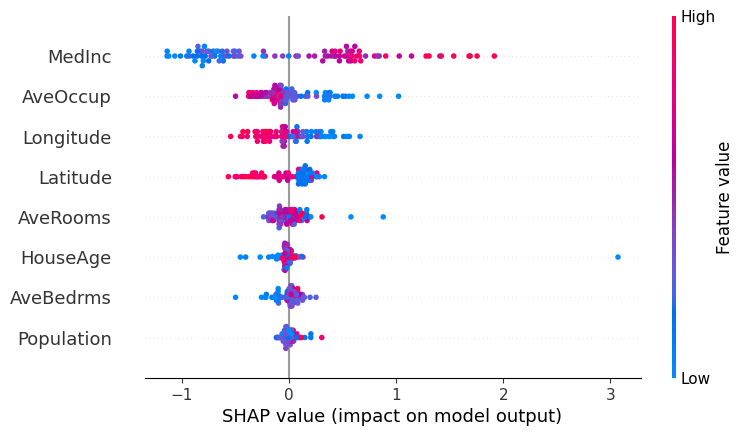

In [ ]:
shap.plots.beeswarm(explanation)

## waterfallプロット

waterfallプロット  
- 縦軸：特徴量の名前と値表示  
- 横軸：shap値  

waterfallプロットでは、各データにおいて、各特徴量が正負どちらの方向にどれだけ貢献したかを確認できます。  

公式ドキュメント  
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html

In [ ]:
import xgboost
import shap
X, y = shap.datasets.california(n_points=100) # サンプルデータ
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model, X)
explanation = explainer(X)

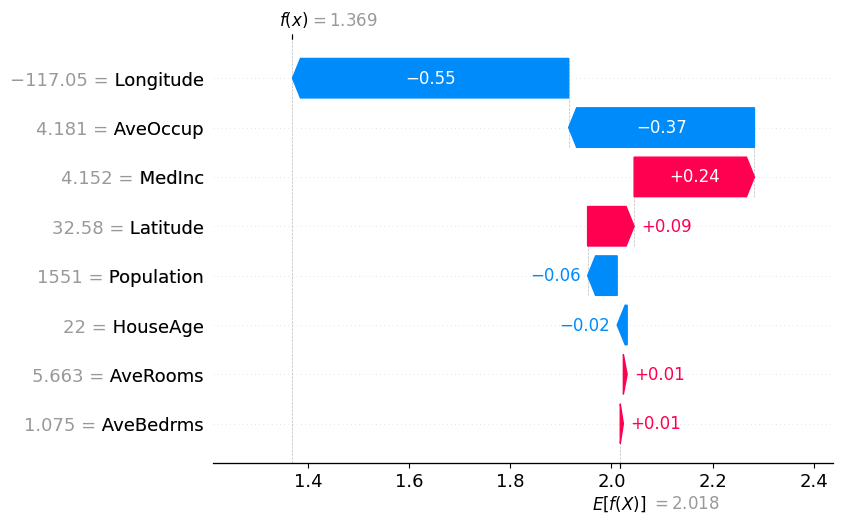

In [ ]:
i = 0
shap.plots.waterfall(explanation[i]) # i番目のデータの予測結果について解釈

In [ ]:
y[0]

np.float64(1.369)

In [ ]:
y.mean()

np.float64(2.0175302999999998)

## forceプロット
forceプロット

1つのデータに対してプロットするときは
横軸に各特徴量のshap値を表示します。

複数データ入力することもでき、
横軸が各データを示し、縦軸がshap値になります。  
データの並び順や、特徴量はドロップダウンで選択可能です



In [ ]:
import xgboost
import shap
X, y = shap.datasets.california(n_points=100) # サンプルデータ
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model, X)
explanation = explainer(X)

In [ ]:
shap.initjs()
shap.plots.force(explanation[0]) # 指定したデータの予測結果について解釈。

In [ ]:
shap.initjs()
shap.plots.force(explanation) # すべてのデータの予測結果について解釈。（上図を縦に回転して全データ横にずらっと並べた形）
# 横軸：各データ(並び順変更可能)、縦軸：各特徴量(指定可能)のshap値

## scatterプロット

scatterプロット

- 横軸：特徴量
- 縦軸：shap値
- 色：ほかの特徴量

指定した特徴量とshap値、さらにほかの特徴量との相互作用を確認できます。

colorにExplanationオブジェクトをまるごと入力した場合、第1引数の特徴量と最も強い相互作用のある特徴量が色軸に選ばれます。  
また、任意の特徴量を指定することも可能です。

詳しくはこちら  
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html




In [ ]:
import xgboost
import shap

# train XGBoost model
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
explanation = explainer(X[:1000])

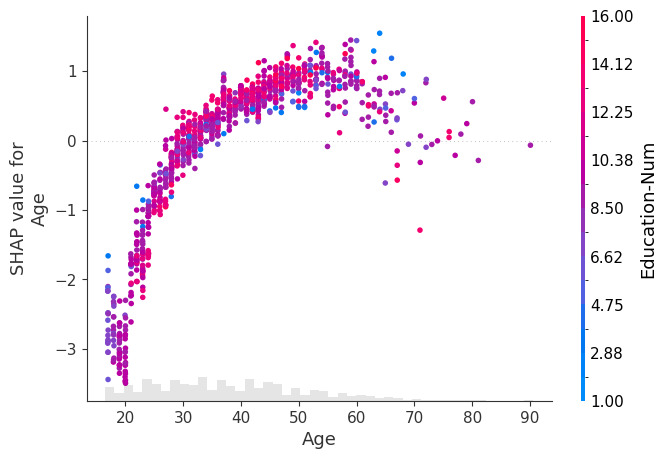

In [ ]:
shap.plots.scatter(explanation[:, "Age"], color=explanation)

In [ ]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39
